In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_location'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_location'].max()
Min = Mexico['review_scores_location'].min()
Limites = [Min, Max]
Limites

[4.05, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

0.9500000000000002

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.06054954379639365

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (4.05, 5.0, 16)
intervalos

array([4.05      , 4.11333333, 4.17666667, 4.24      , 4.30333333,
       4.36666667, 4.43      , 4.49333333, 4.55666667, 4.62      ,
       4.68333333, 4.74666667, 4.81      , 4.87333333, 4.93666667,
       5.        ])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_location'] = pd.cut ( x = Mexico ['review_scores_location'], bins = intervalos, labels = categorias )
Mexico['review_scores_location']

0        Categoria14
1        Categoria15
2        Categoria15
3        Categoria15
4        Categoria14
            ...     
26577    Categoria14
26578    Categoria14
26579    Categoria14
26580    Categoria14
26581    Categoria14
Name: review_scores_location, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [13]:
table1 = freq_tbl(Mexico['review_scores_location'])
table1

,review_scores_location,frequency,percentage,cumulative_perc
0,Categoria15,10971,0.412723,0.412754
1,Categoria14,7955,0.299263,0.712039
2,Categoria13,2305,0.086713,0.798758
3,Categoria12,1911,0.071891,0.870655
4,Categoria11,913,0.034347,0.905004
5,Categoria10,811,0.030509,0.935515
6,Categoria8,511,0.019224,0.954740
7,Categoria9,510,0.019186,0.973928
8,Categoria6,168,0.006320,0.980248
9,Categoria5,163,0.006132,0.986381


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_location,frequency
0,Categoria15,10971
1,Categoria14,7955
2,Categoria13,2305
3,Categoria12,1911
4,Categoria11,913
5,Categoria10,811
6,Categoria8,511
7,Categoria9,510
8,Categoria6,168
9,Categoria5,163


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_location')
Filtro_index

,frequency
review_scores_location,
Categoria15,10971
Categoria14,7955
Categoria13,2305
Categoria12,1911
Categoria11,913
Categoria10,811
Categoria8,511
Categoria9,510
Categoria6,168


Text(0, 0.5, 'Frecuencia')

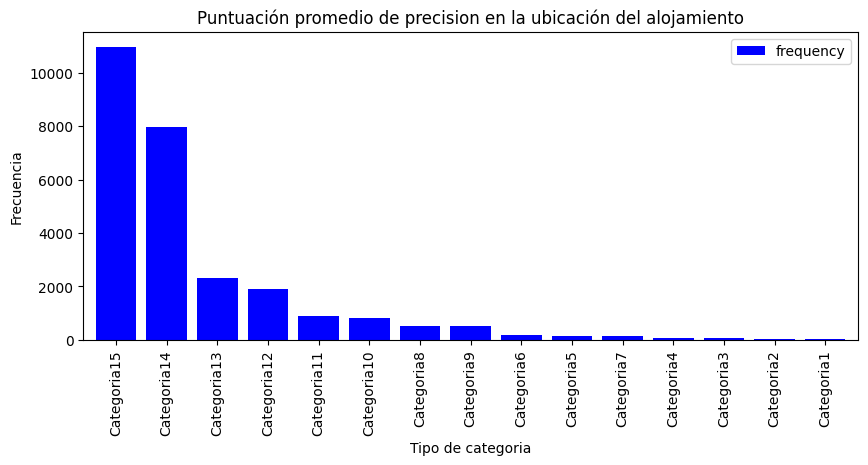

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de precision en la ubicación del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')